In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imdb = pd.read_csv('movie_metadata.csv')
imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
imdb.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [4]:
#Distributing columns to Numerical and Categorical
Num_col = [column for column in imdb.columns if imdb[column].dtype != 'object']
Cat_col = [column for column in imdb.columns if imdb[column].dtype == 'object']

In [5]:
Num_col

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [6]:
Cat_col

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

In [7]:
imdb = imdb.drop(columns=['color','director_name','actor_2_name','language','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','content_rating'], axis = 1)

In [8]:
# Filling missing values

imdb['duration'].fillna(imdb['duration'].mean(), inplace=True)
imdb['num_critic_for_reviews'].fillna(imdb['num_critic_for_reviews'].mean(), inplace=True)
imdb['director_facebook_likes'].fillna(imdb['director_facebook_likes'].mean(), inplace=True)
imdb['actor_3_facebook_likes'].fillna(imdb['actor_3_facebook_likes'].mean(), inplace=True)
imdb['actor_1_facebook_likes'].fillna(imdb['actor_1_facebook_likes'].mean(), inplace=True)
imdb['gross'].fillna(imdb['gross'].mean(), inplace=True)
imdb['num_voted_users'].fillna(imdb['num_voted_users'].mean(), inplace=True)
imdb['cast_total_facebook_likes'].fillna(imdb['cast_total_facebook_likes'].mean(), inplace=True)
imdb['facenumber_in_poster'].fillna(imdb['facenumber_in_poster'].mean(), inplace=True)
imdb['num_user_for_reviews'].fillna(imdb['num_user_for_reviews'].mean(), inplace=True)
imdb['budget'].fillna(imdb['budget'].mean(), inplace=True)
imdb['title_year'].fillna(imdb['title_year'].mean(), inplace=True)
imdb['actor_2_facebook_likes'].fillna(imdb['actor_2_facebook_likes'].mean(), inplace=True)
imdb['imdb_score'].fillna(imdb['imdb_score'].mean(), inplace=True)
imdb['movie_facebook_likes'].fillna(imdb['movie_facebook_likes'].mean(), inplace=True)
imdb['aspect_ratio'].fillna(imdb['aspect_ratio'].mean(), inplace=True)

In [9]:
#Modifying genres columns
imdb['genres'] = imdb['genres'].str.replace('|', ',')

In [10]:
imdb.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genres                       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
country                      5
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [11]:
imdb.shape

(5043, 18)

In [12]:
imdb.dropna()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.000000,855.0,1000.0,7.605058e+08,"Action,Adventure,Fantasy,Sci-Fi",886204,4834,0.0,3054.0,USA,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,302.0,169.0,563.000000,1000.0,40000.0,3.094042e+08,"Action,Adventure,Fantasy",471220,48350,0.0,1238.0,USA,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,602.0,148.0,0.000000,161.0,11000.0,2.000742e+08,"Action,Adventure,Thriller",275868,11700,1.0,994.0,UK,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,813.0,164.0,22000.000000,23000.0,27000.0,4.481306e+08,"Action,Thriller",1144337,106759,0.0,2701.0,USA,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
5,462.0,132.0,475.000000,530.0,640.0,7.305868e+07,"Action,Adventure,Sci-Fi",212204,1873,1.0,738.0,USA,2.637000e+08,2012.000000,632.0,6.6,2.350000,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.000000,318.0,637.0,4.846841e+07,"Comedy,Drama",629,2283,2.0,6.0,Canada,3.975262e+07,2013.000000,470.0,7.7,2.220403,84
5039,43.0,43.0,686.509212,319.0,841.0,4.846841e+07,"Crime,Drama,Mystery,Thriller",73839,1753,1.0,359.0,USA,3.975262e+07,2002.470517,593.0,7.5,16.000000,32000
5040,13.0,76.0,0.000000,0.0,0.0,4.846841e+07,"Drama,Horror,Thriller",38,0,0.0,3.0,USA,1.400000e+03,2013.000000,0.0,6.3,2.220403,16
5041,14.0,100.0,0.000000,489.0,946.0,1.044300e+04,"Comedy,Drama,Romance",1255,2386,5.0,9.0,USA,3.975262e+07,2012.000000,719.0,6.3,2.350000,660


In [13]:
imdb.shape

(5043, 18)

In [14]:
imdb['country'].value_counts()

USA                   3807
UK                     448
France                 154
Canada                 126
Germany                 97
                      ... 
Finland                  1
Nigeria                  1
Dominican Republic       1
Pakistan                 1
Kenya                    1
Name: country, Length: 65, dtype: int64

In [15]:
#Replacing other than USA & UK with others
countries = ['USA', 'UK']
imdb['country'] = imdb['country'].where(imdb['country'].isin(countries), 'other')
imdb['country'].value_counts()

USA      3807
other     788
UK        448
Name: country, dtype: int64

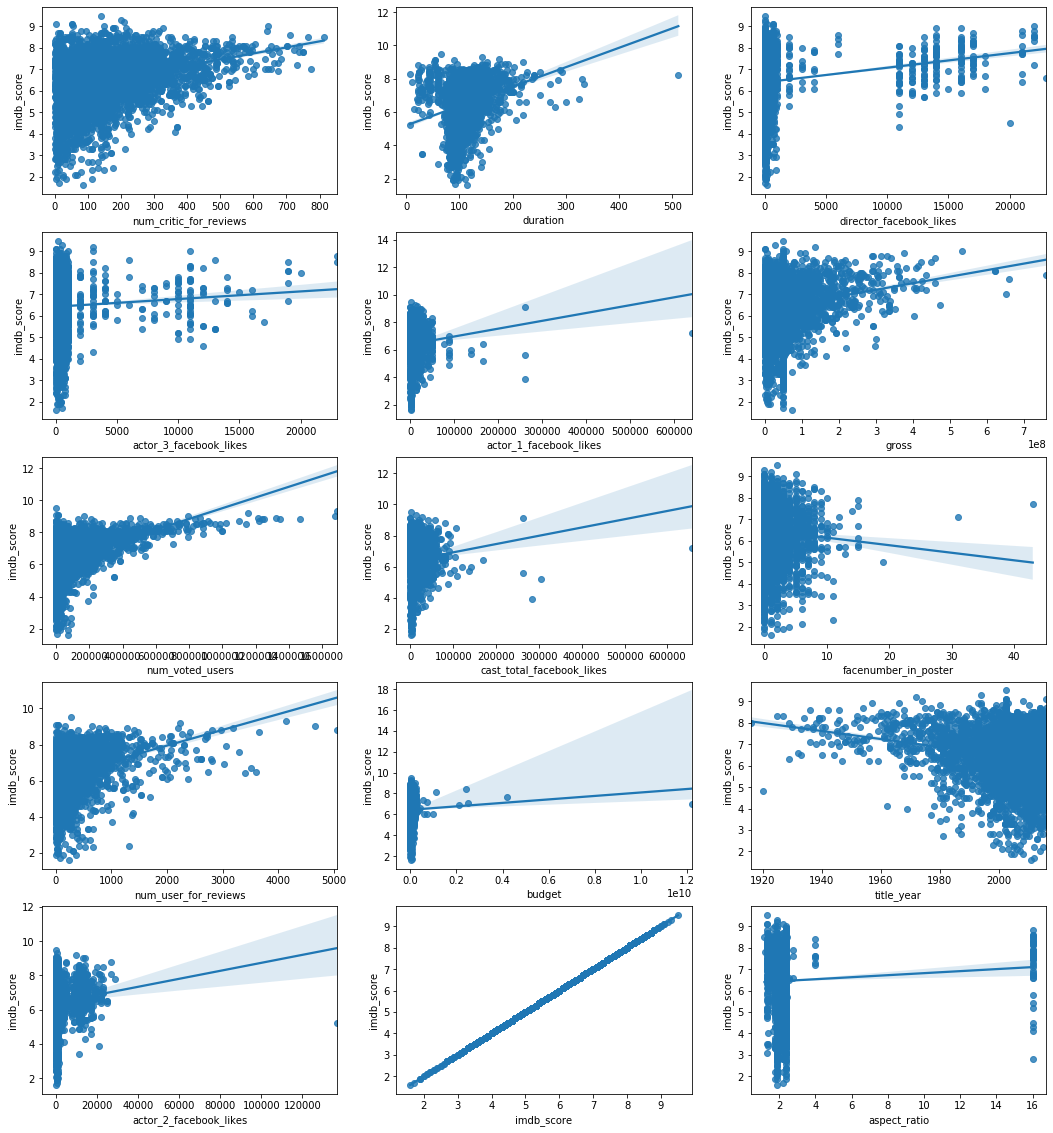

In [16]:
fig, ax = plt.subplots(round(len(Num_col) / 3), 3, figsize=(18,20))

for i, ax in enumerate(fig.axes):
    if i < len(Num_col) - 1:
        sns.regplot(x=Num_col[i], y='imdb_score', data=imdb[Num_col],ax=ax, label=Num_col)

# Label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list = ['genres', 'aspect_ratio', 'country']
imdb[cat_list] = imdb[cat_list].apply(lambda x:le.fit_transform(x))

In [18]:
imdb.head()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.000000,178.000000,0.0,855.000000,1000.0,7.605058e+08,106,886204,4834,0.0,3054.000000,1,2.370000e+08,2009.000000,936.0,7.9,9,33000
1,302.000000,169.000000,563.0,1000.000000,40000.0,3.094042e+08,100,471220,48350,0.0,1238.000000,1,3.000000e+08,2007.000000,5000.0,7.1,16,0
2,602.000000,148.000000,0.0,161.000000,11000.0,2.000742e+08,127,275868,11700,1.0,994.000000,0,2.450000e+08,2015.000000,393.0,6.8,16,85000
3,813.000000,164.000000,22000.0,23000.000000,27000.0,4.481306e+08,287,1144337,106759,0.0,2701.000000,1,2.500000e+08,2012.000000,23000.0,8.5,16,164000
4,140.194272,107.201074,131.0,645.009761,131.0,4.846841e+07,753,8,143,0.0,272.770808,2,3.975262e+07,2002.470517,12.0,7.1,14,0


In [19]:
#imdb.drop('country', axis=1, inplace=True)

## Model Building

## Split Dataset

In [20]:
#Dependent variable
y = imdb.pop('imdb_score')

selected_features = ['num_voted_users', 'num_user_for_reviews',  'cast_total_facebook_likes', 'genres', 'title_year', 'budget','duration']
X = imdb[selected_features]
X

,num_voted_users,num_user_for_reviews,cast_total_facebook_likes,genres,title_year,budget,duration
0,886204,3054.000000,4834,106,2009.000000,2.370000e+08,178.000000
1,471220,1238.000000,48350,100,2007.000000,3.000000e+08,169.000000
2,275868,994.000000,11700,127,2015.000000,2.450000e+08,148.000000
3,1144337,2701.000000,106759,287,2012.000000,2.500000e+08,164.000000
4,8,272.770808,143,753,2002.470517,3.975262e+07,107.201074
...,...,...,...,...,...,...,...
5038,629,6.000000,2283,605,2013.000000,3.975262e+07,87.000000
5039,73839,359.000000,1753,735,2002.470517,3.975262e+07,43.000000
5040,38,3.000000,0,823,2013.000000,1.400000e+03,76.000000
5041,1255,9.000000,2386,638,2012.000000,3.975262e+07,100.000000


In [21]:
#Splitting into Test and Train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)

(3782, 7)
(3782,)


## Scaling

In [22]:
#Scaling the dependent variables
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train.values), 
                       columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(sc.transform(X_test.values), 
                      columns=X_train.columns, index=X_test.index)

In [23]:
import xgboost as xgb
xg_model = xgb.XGBRegressor(random_state=15)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:

predictions = xg_model.predict(X_test)
predictions

array([5.6419706, 7.1888676, 6.393696 , ..., 6.6578403, 5.0831957,
       7.0620112], dtype=float32)

In [25]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(predictions, y_test.values)

0.6439428099592869

In [26]:
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.56 degrees.


In [27]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.32 %.


In [28]:
xg_model.score(X_train, y_train)

0.9384619316246242

In [29]:
xg_model.score(X_test, y_test)

0.513285995799502

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.513285995799502

In [31]:
from sklearn.model_selection import GridSearchCV

para_grid = {
    'max_depth' : [3, 4],
    'learning_rate' : [0.1, 0.01, 0.05],
    'n_estimators' : [10,100, 500]
}

#create a based model
model_xgb = xgb.XGBRegressor()
#instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = model_xgb, param_grid = para_grid,
                               cv=3, n_jobs=4, verbose=3)

In [32]:
grid_search_xgb.fit(X_train, y_train)
grid_search_xgb.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}

In [33]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [34]:
mean_squared_error(y_test.values, y_pred_xgb)

0.6115063233716065

In [35]:
errors = abs(y_pred_xgb - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.55 degrees.


In [36]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.49 %.


In [37]:
grid_search_xgb.score(X_train, y_train)

0.7877860618866929

In [38]:
r2_score(y_test.values, y_pred_xgb)

0.5378026019718479

In [39]:
M=4285
S=84
N=163
J=7
Y=2004
W=1100
D=90

pp=np.array([[M,S,N,J,Y,W,D]])
pred = xg_model.predict(pp)
print(pred)
result1=round(pred[0],2)
print(result1)

[8.586017]
8.59


In [40]:
M=5464
S=321
N=654
J=4
Y=2001
W=237000
D=178

pp=np.array([[M,S,N,J,Y,W,D]])
pred = grid_search_xgb.predict(pp)
print(pred)

[8.845636]


In [ ]:
import anvil.server
import anvil.media
anvil.server.connect("GQ3FMMXUD5NBMA33DJL2HBJH-RBKCNQPW2QLXYRU3")

@anvil.server.callable
def get_accuracy_xgb_reg():
  # Return a file from this local machine
  return round(accuracy, 2)

@anvil.server.callable
def get_imdb_score(pred):
  # Return a file from this local machine
    votes=pred[0]
    review=pred[1]
    cast=pred[2]
    genre=pred[3]
    year=pred[4]
    budget=pred[5]
    duration= pred[6]
    lst=np.array([[votes,review,cast,genre,year,budget,duration]])
    res=grid_search_xgb.predict(lst)
    result=round(res[0],2)
    return result

anvil.server.wait_forever()

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER
